In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit, KFold, StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn import svm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold



from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, zero_one_loss, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import pickle
from sklearn import svm

from sklearn.feature_selection import VarianceThreshold

from sklearn.feature_selection import SelectPercentile

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE

In [5]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  =  'test_house_A.csv'# содержит только имя файла, без имен папок

In [6]:
df_train = pd.read_csv('train_house_A.csv')
df_train

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,...,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,...,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,...,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,...,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [7]:
df_train = pd.read_csv(path_train)
df_train

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,...,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,...,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,...,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,...,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [8]:
df_train.isna().sum()

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

In [9]:
df_train.drop_duplicates()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,...,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,...,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,...,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,...,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [10]:
X = df_train.drop(['price'],axis=1)
y = df_train['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.3)
X_train.shape

(285, 29)

### Логика: на базе гб найти лучшую комбинацию фич или сделать подсчет наиболее часто встречающихся в разных алгоритмах хороших фич



In [12]:
num = df_train.drop('price', axis=1).columns


CT = ColumnTransformer([
    ('num_transform', MinMaxScaler(), num)
])

display(CT)
X_train_ct = CT.fit_transform(X_train)
X_test_ct = CT.transform(X_test)

ColumnTransformer(transformers=[('num_transform', MinMaxScaler(),
                                 Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'],
      dtype='object'))])

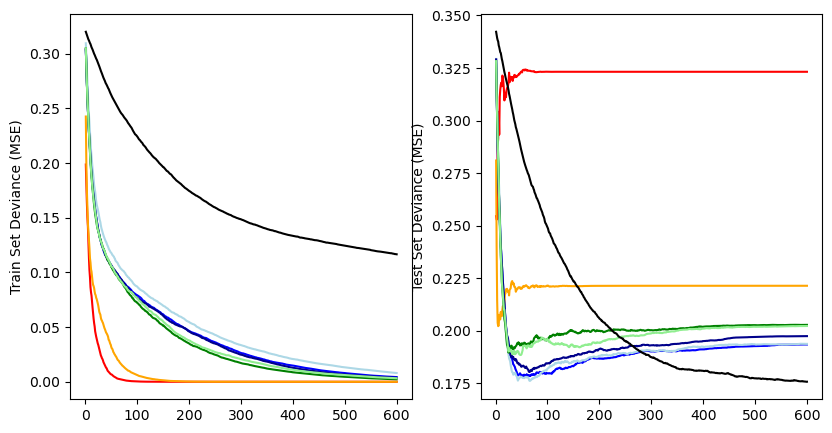

In [13]:
labels, y = np.unique(df_train.price, return_inverse=True)
X_train_transformed = CT.fit_transform(X_train)
X_test_transformed = CT.transform(X_test)

original_params = {
    "n_estimators": 600,
    "random_state": 42,
    'criterion': 'friedman_mse'
}

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax3 = fig.add_subplot(132)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, баггинг=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, баггинг=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, баггинг=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingRegressor(**params)
    clf.fit(X_train_transformed, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_train_transformed)):
        train_deviance[i] = mean_absolute_percentage_error(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test_transformed)):
        test_deviance[i] = mean_absolute_percentage_error(y_test, y_pred)
        
    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax1.set_ylabel("Train Set Deviance (MSE)")
ax3.set_ylabel("Test Set Deviance (MSE)")
plt.show()

In [15]:
pipe_gb = Pipeline([
    ('preproc', CT),
    ('model', GradientBoostingRegressor(learning_rate=0.1, subsample=1.0, max_features='sqrt', n_estimators=70))])

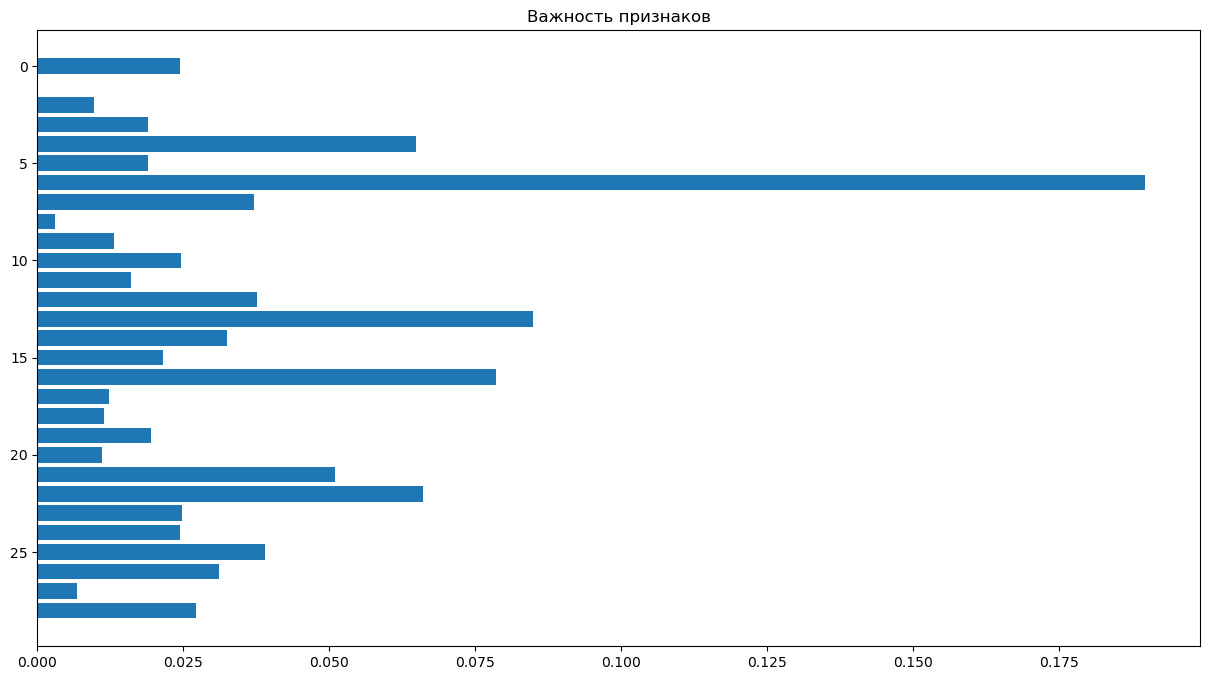

In [17]:
gb = GradientBoostingRegressor(learning_rate=0.1, subsample=1.0, max_features='sqrt', n_estimators=70)
gb.fit(CT.fit_transform(X_train), y_train)
df_ct = pd.DataFrame(CT.fit_transform(X_train))
plt.figure(figsize=(15,8))
feature_names = np.array(df_ct.columns)

importance = np.sort(gb.feature_importances_)
importance_name = np.argsort(gb.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name], )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

In [32]:
top = np.argsort(importance_name)
top_features = top[-15:]
top_features

array([19, 12, 26,  6,  5, 11,  4, 23, 25, 16, 14, 22, 18,  2, 17],
      dtype=int64)

In [18]:
y_pred = gb.predict(CT.transform(X_test))


mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

MAPE: 0.18461767364572249


array(['0', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28'], dtype=object)

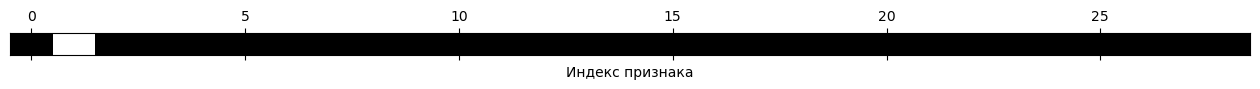

In [42]:

ths = (.9 * (1 - .9))
cancer_var = VarianceThreshold(threshold = ths)
cancer_var.fit_transform(X_train)
mask = cancer_var.get_support()


plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака")
cancer_var.get_support()
# noisy_columns = df.columns[~mask]
# noisy_data = filtered_df[noisy_columns]
# noisy_data
df_var.get_feature_names_out()

array(['3', '4', '5', '6', '7', '12', '13', '14', '16', '21', '22', '24',
       '25', '26'], dtype=object)

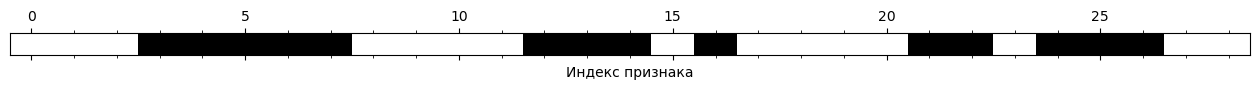

In [26]:
rfe_select = RFE(GradientBoostingRegressor(learning_rate=0.1, subsample=1.0, max_features='sqrt', n_estimators=70))

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask3 = rfe_select.get_support()
plt.matshow( mask3.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask3.sum()
rfe_select.get_feature_names_out()

In [52]:
display(top_features)

display(df_var.get_feature_names_out())
pd.Series(np.concatenate([rfe_select.get_feature_names_out(),df_var.get_feature_names_out()])).value_counts()

array([19, 12, 26,  6,  5, 11,  4, 23, 25, 16, 14, 22, 18,  2, 17],
      dtype=int64)

array(['0', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28'], dtype=object)

3     2
16    2
4     2
26    2
25    2
24    2
21    2
22    2
14    2
13    2
12    2
7     2
6     2
5     2
17    1
27    1
23    1
20    1
19    1
18    1
0     1
15    1
11    1
10    1
9     1
8     1
2     1
28    1
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array(['4', '5', '6', '7', '8', '9', '10', '12', '16', '21', '22', '24',
       '25', '28'], dtype=object)

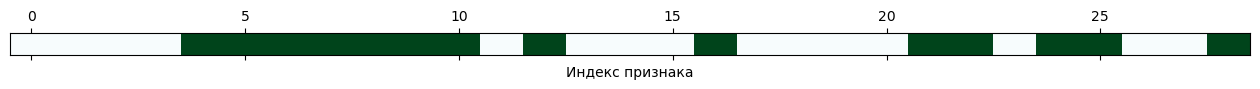

In [53]:
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

mask4 = select_pct.get_support()
plt.matshow( mask4.reshape(1,-1), cmap = 'BuGn', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");
select_pct.get_feature_names_out()

# итого: что-то вроде войтинга

In [58]:
coll = pd.DataFrame(np.concatenate([rfe_select.get_feature_names_out(),df_var.get_feature_names_out(),select_pct.get_feature_names_out()]))

In [87]:
coll

,0
0,3
1,4
2,5
3,6
4,7
5,12
6,13
7,14
8,16
9,21


In [82]:
sort = coll.value_counts()

In [61]:
coll2 = pd.DataFrame(top_features)
coll2.value_counts()

2     1
4     1
5     1
6     1
11    1
12    1
14    1
16    1
17    1
18    1
19    1
22    1
23    1
25    1
26    1
dtype: int64

In [86]:
sort[sort>=2]

22    3
24    3
12    3
7     3
6     3
5     3
16    3
4     3
25    3
21    3
8     2
3     2
28    2
26    2
9     2
10    2
14    2
13    2
dtype: int64

In [79]:

listt = [22,24,12,7,6,5,16,4,25,21,8,3,28,26,9,10,14,13]

In [80]:
gbf = GradientBoostingRegressor(learning_rate=0.1, subsample=1.0, max_features='sqrt', n_estimators=70)

gbf.fit(CT.transform(X_train)[:, listt], y_train)
mean_absolute_percentage_error(y_test, gbf.predict(CT.transform(X_test)[:, listt]))

0.17885705830020635